## <u>ASSIGNMENT 03: COMP7116001 - COMPUTER VISION 2022</u>

<table>
    <tr>
        <th style="text-align:left;">Name</th>
        <td style="text-align:left;">Cindy Amanda Onggirawan</td>
        <th style="text-align:left;">Lecturer</th>
        <td style="text-align:left;">Dr. Ir. Diaz D. Santika, M.Sc.</td>
    </tr>
    <tr>
        <th style="text-align:left;">NIM</th>
        <td style="text-align:left;">2440055351</td>
        <th style="text-align:left;">Lecturer Code</th>
        <td style="text-align:left;">D1159</td>
    </tr>
    <tr>
        <th style="text-align:left;">Class</th>
        <td style="text-align:left;" colspan="3">LA01</td>
    </tr>
</table>

### A. Describe the principle different between Canny dan Laplacian of Gaussian.

Canny edge detector didasarkan pada <b>turunan pertama</b> dari gambar (konvolusi Sobel mask dalam arah x dan y). Besarnya turunan akan terlihat seperti ini:

<img src="./canny.png" width="250"></img>

Kita dapat melihat bahwa melalui operasi ini, garis dapat diidentifikasi ketika pikselnya memiliki nilai tinggi (berwarna putih). Algoritma canny kemudian juga akan menerapkan non-maxima suppresion dan line tracing.

Sedangkan, Laplacian of Gaussian didasarkan pada <b>turunan kedua</b> dari gambar, sehingga hasilnya menjadi sangat sensitif terhadap noise. Nantinya, edge pada gambar akan terlihat seperti ini:

<img src="./log.gif" width="200"></img>

Respons tertinggi dari operator Laplacian of Gaussian akan berada di tengah struktur seperti gumpalan (blob) dalam gambar. Garis dapat diidentifikasi menggunakan titik belok (zero-crossings), bukan dengan mencari magnitudo tinggi pada gambar. Kita dapat melihat bahwa pada setiap garis, satu sisinya berwarna gelap dan sisi lainnya berwarna putih.

### B. What do you know about (1) Non-maximum suppression and (2) Hysteresis thresholding in Canny edge detection. Implement the aforementioned both steps in python notebook and demonstrate the results.

(1) Non-maximum suppression
<br>
Langkah ini bertujuan untuk mengurangi piksel hasil penggabungan yang bersifat duplikat di sepanjang edge-nya agar tidak rata. Untuk setiap piksel temukan dua tetangga dalam arah gradien positif dan negatif. Anggaplah setiap tetangga menempati sudut pi /4, dan 0 adalah arah lurus ke kanan. Jika besarnya piksel saat ini lebih besar dari besarnya tetangga, tidak ada yang berubah. Namun, jika tidak, besarnya piksel saat ini diatur ke nol.

(2) Hysteresis thresholding
<br>
Karena piksel weak edge yang disebabkan oleh true edges akan dihubungkan ke piksel strong edge, piksel W dengan weak gradient ditandai sebagai edge dan disertakan dalam final edge map jika dan hanya jika terlibat dalam komponen yang sama yang terhubung dengan beberapa piksel S dengan strong gradient. Dengan kata lain, harus ada rantai weak pixels tetangga yang menghubungkan W dan S (tetangga dengan 8 piksel di sekitar piksel akan dipertimbangkan). Kita akan membuat dan menerapkan algoritma yang menemukan semua komponen gradient map yang terhubung dengan mempertimbangkan setiap piksel hanya sekali. Setelah itu, kita dapat memutuskan piksel mana yang akan dimasukkan dalam final edge map.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./image.png')

Kita konversi gambar ke grayscale.

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

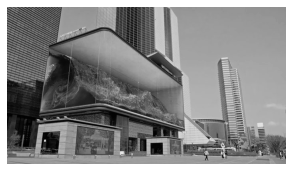

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

Kita kurangi noise pada gambar dengan menerapkan gaussian blur.

In [5]:
img = cv2.GaussianBlur(img, (5, 5), 1.4)

Kita hitung gradientnya.

In [6]:
gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)

Kita konversikan koordinat cartesian ke polar.

In [7]:
mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)

Kita atur ambang batas (threshold) minimum dan maksimum untuk ambang batas ganda.

In [8]:
weak_th = None
strong_th = None

mag_max = np.max(mag)
if not weak_th:weak_th = mag_max * 0.1
if not strong_th:strong_th = mag_max * 0.5

Kita simpan dimensi gambar.

In [9]:
height, width = img.shape

Kita melakukan looping untuk setiap piksel dari gambar.

In [10]:
for i_x in range(width):
    for i_y in range(height):
               
        grad_ang = ang[i_y, i_x]
        grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
               
        # Memilih tetangga dari piksel target sesuai dengan arah gradien
        # Dalam arah sumbu x
        if grad_ang<= 22.5:
            neighb_1_x, neighb_1_y = i_x-1, i_y
            neighb_2_x, neighb_2_y = i_x + 1, i_y
              
        # Arah kanan atas (diagonal-1)
        elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
            neighb_1_x, neighb_1_y = i_x-1, i_y-1
            neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
              
        # Dalam arah sumbu y
        elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
            neighb_1_x, neighb_1_y = i_x, i_y-1
            neighb_2_x, neighb_2_y = i_x, i_y + 1
              
        # Arah kiri atas (diagonal-2)
        elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
            neighb_1_x, neighb_1_y = i_x-1, i_y + 1
            neighb_2_x, neighb_2_y = i_x + 1, i_y-1
              
        # Memulai kembali siklus
        elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
            neighb_1_x, neighb_1_y = i_x-1, i_y
            neighb_2_x, neighb_2_y = i_x + 1, i_y
               
        # Non-maximum suppression step
        if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
            if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
                mag[i_y, i_x]= 0
                continue
   
        if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
            if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
                mag[i_y, i_x]= 0

weak_ids = np.zeros_like(img)
strong_ids = np.zeros_like(img)              
ids = np.zeros_like(img)

Kita melakukan ambang batas ganda (double thresholding).

In [11]:
for i_x in range(width):
    for i_y in range(height):
              
        grad_mag = mag[i_y, i_x]
              
        if grad_mag<weak_th:
            mag[i_y, i_x]= 0
        elif strong_th>grad_mag>= weak_th:
            ids[i_y, i_x]= 1
        else:
            ids[i_y, i_x]= 2

Kita menunjukkan besarnya gradien dari edges.

In [12]:
# Hysteresis thresholding step
print(mag)

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [102.         112.79184368 123.36936411 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


Kita lihat hasil Canny Edge Detector.

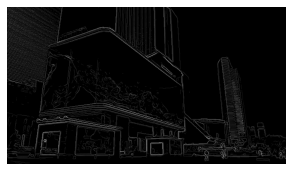

In [13]:
plt.figure(figsize=(5,5))
plt.imshow(mag, cmap='gray')
plt.axis('off')
plt.show()

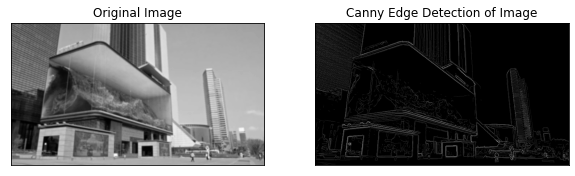

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(mag, cmap='gray')
plt.title('Canny Edge Detection of Image')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.show()

## THANK YOU